In [1]:
import torch

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from utils import *

In [2]:
%matplotlib widget

In [3]:
x = torch.linspace(-10, 10, 500)

In [4]:
f = lambda x: with_grad(x ** 2)

In [5]:
y = []
dy_dx = []
for point in x:
    point.requires_grad_(True)
    y.append(f(point))
    dy_dx.append(point.grad)

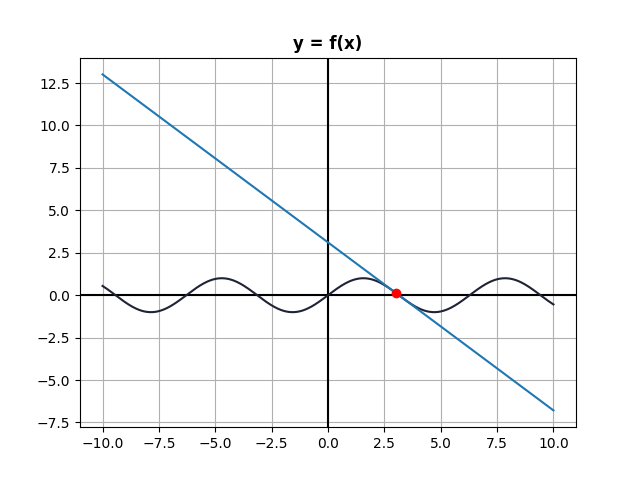

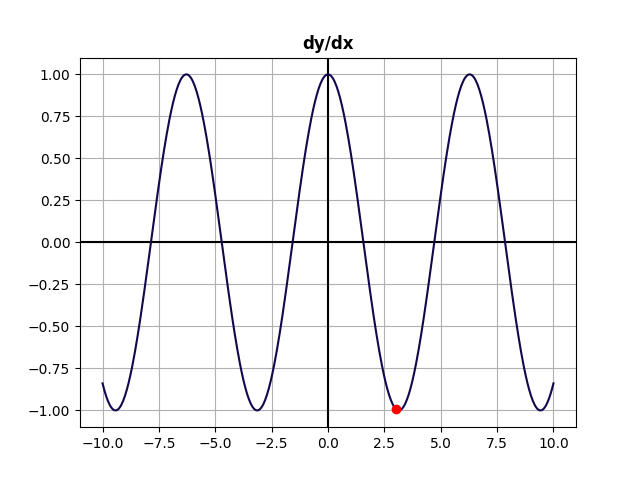

In [49]:
# f(x)
plot_points(x, y, "y = f(x)")

# Tangent line
p = 3.0
p = torch.tensor(p).requires_grad_(True)
f_p = f(p)
tan_line = [p.grad * point - p.grad * p + f_p for point in x]
plt.plot(x, tan_line)
plt.plot([p], [f_p], "ro")

# dy/dx
plot_points(x, dy_dx, "dy/dx")
plt.plot([p], [p.grad], "ro")
plt.plot([], [])

## Tangent Lines

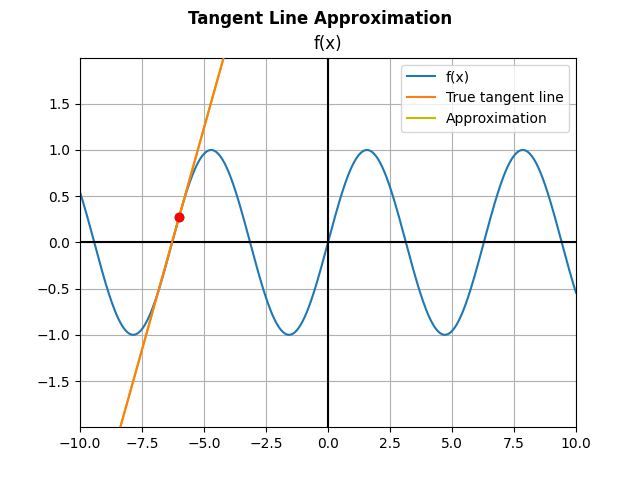

In [50]:
fig, ax_f = plt.subplots()
fig.suptitle("Tangent Line Approximation", fontweight="bold")

ax_f.grid()

ax_f.set_title("f(x)")

ax_f.plot(x, y, label="f(x)")

p = -6.0
p = torch.tensor(p).requires_grad_(True)
f_p = f(p)
ax_f.plot([p], [f_p], "ro", zorder=10)
ax_f.plot(x, [p.grad * point - p.grad * p + f_p for point in x], zorder=9, label="True tangent line")

qs = torch.linspace(p.data + 3.0, p.data + 0.0001, 200)
f_qs = [f(q.requires_grad_(True)) for q in qs]

tan_line, = ax_f.plot([], "y", label="Approximation")
q_tan_line, = ax_f.plot([], "go")

ax_f.axhline(y=0, color='k')
ax_f.axvline(x=0, color='k')
ax_f.set_xlim(min(x).data, max(x).data)
ax_f.set_ylim(min(y).data - 1, max(y).data + 1)

def animate_tangent_line(ord_pair):
    q, f_q = ord_pair
    m = (f_p - f_q) / (p - q)
    tan_line.set_data((x, [m * point - m * q + f_q for point in x]))
    q_tan_line.set_data(([q], [f_q]))

anim = FuncAnimation(fig, animate_tangent_line, frames=zip(qs, f_qs), interval=1, repeat=False)

tan_line.set_data((x, [p.grad * point - p.grad * p + f_p for point in x]))
q_tan_line.set_data(([p], [f_p]))

plt.legend(loc='upper right')
plt.show()

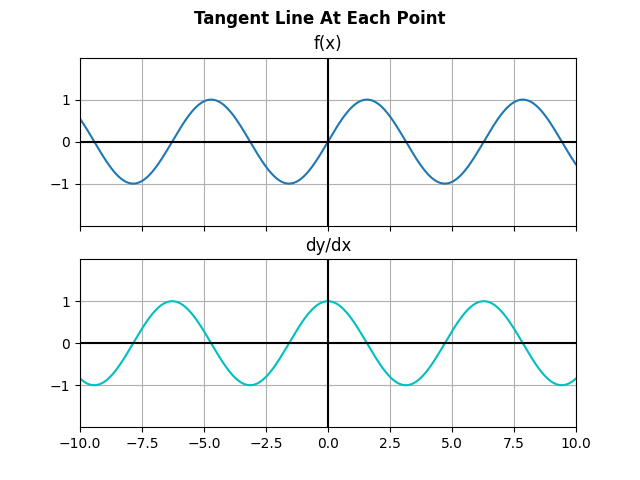

In [51]:
fig, (ax_f, ax_d) = plt.subplots(2, sharex=True)
fig.suptitle("Tangent Line At Each Point", fontweight="bold")

ax_f.grid()
ax_d.grid()

ax_f.set_title("f(x)")
ax_d.set_title("dy/dx")

ax_f.plot(x, y)
ax_d.plot(x, dy_dx, "c")

tan_line, = ax_f.plot([])
p_tan_line, = ax_f.plot([], "ko", zorder=10)
p_d, = ax_d.plot([], "ro", zorder=10)

ax_f.axhline(y=0, color='k')
ax_f.axvline(x=0, color='k')
ax_f.set_xlim(min(x).data, max(x).data)
ax_f.set_ylim(min(y).data - 1, max(y).data + 1)

ax_d.axhline(y=0, color='k')
ax_d.axvline(x=0, color='k')
ax_d.set_xlim(min(x).data, max(x).data)
ax_d.set_ylim(min(dy_dx).data - 1, max(dy_dx).data + 1)

def animate_tangent_line(p):
    p_x, p_y, dp = p
    if dp < 0:
        tan_line.set_color("r")
        p_d.set_color("r")
    elif dp == 0:
        tan_line.set_color("k")
        p_d.set_color("k")
    else:
        tan_line.set_color("g")
        p_d.set_color("g")
        
    tan_line.set_data((x, [dp * point - dp * p_x + p_y for point in x]))
    p_tan_line.set_data(([p_x], [p_y]))
    p_d.set_data(([p_x], [dp]))

anim = FuncAnimation(fig, animate_tangent_line, frames=zip(x, y, dy_dx), interval=1, repeat=False)
plt.show()

## Gradient Descent

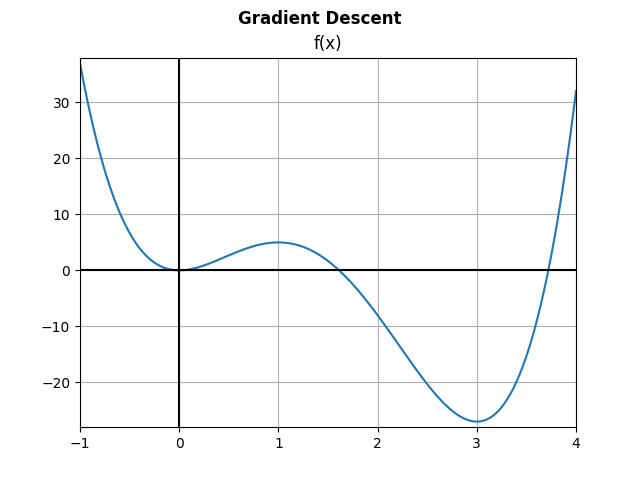

In [5]:
fig, ax_f = plt.subplots()
fig.suptitle("Gradient Descent", fontweight="bold")

ax_f.grid()

ax_f.set_title("f(x)")

ax_f.plot(x, y, label="f(x)")

p = -0.75
p = torch.tensor(p).requires_grad_(True)
ps, f_ps, dp = gradient_descent(f, p, lr=0.001, eps=0.05)
num_steps = 3
frames = list(enumerate(torch.tensor(list(zip(ps, f_ps, dp))).repeat_interleave(num_steps, dim=0)))

p_plot, = ax_f.plot([], "ro", zorder=10)
p_tan_line, = ax_f.plot([])
new_p_plot, = ax_f.plot([], "yo", zorder=9)

ax_f.axhline(y=0, color='k')
ax_f.axvline(x=0, color='k')
ax_f.set_xlim(min(x).data, max(x).data)
ax_f.set_ylim(min(y).data - 1, max(y).data + 1)

def animate_descent(frame):
    i, grad_desc_data = frame
    p, f_p, dp = grad_desc_data
    if i % num_steps == 0:
        # Render just the point on curve
        p_plot.set_data(([p], [f_p]))
        p_tan_line.set_data(([], []))
        new_p_plot.set_data(([], []))
    elif i % num_steps == 1:
        # Render tangent line around point
        p_tan_line.set_data((x, [dp * point - dp * p + f_p for point in x]))
    elif i % num_steps == 2:
        # Render new point down line
        new_p = frames[i + 1][1][0] if i < len(frames) - 1 else frames[-1][1][0]
        new_p_plot.set_data(([new_p], [dp * new_p - dp * p + f_p]))

anim = FuncAnimation(fig, animate_descent, frames=frames, interval=500, repeat=False)

plt.show()

In [4]:
x = torch.linspace(-1, 4, 500)
f = lambda x: with_grad(3 * x ** 4 - 16 * x ** 3 + 18 * x ** 2)
y = []
dy_dx = []
for point in x:
    point.requires_grad_(True)
    y.append(f(point))
    dy_dx.append(point.grad)